In [1]:
import numpy as np
import pandas as pd
from myfunctions import BPstar
from myfunctions import BPstarmodel
import matplotlib.pyplot as plt
import os
from est_model import estimate_model

## Initialisation, simulation, et replications

### Paramètres de la simulation:

In [2]:
#initialisations des parametres du modele pour simulation
A = np.array([[0.3, 0.2],[0.1, 0.3]])
B = np.array([[0.1, 0.2],[0.3, 0.2]])
omeg = np.array([0.5, 0.3])
delt = 0.4
n = 200 #longeure de la trajectoire

works well:
#initialisations des parametres du modele pour simulation
A = np.array([[0.2, 0],[0, 0.4]])
B = np.array([[0.5, 0],[0, 0.3]])
omeg = np.array([0.3, 0.5])
delt = 0.7
n = 500 #longeure de la trajectoire

### Simulation d'une trajectoire

In [3]:
y = BPstarmodel(A, B, omeg, n, delt) #simuler une trajectoire

In [4]:
np.savetxt("databp.csv", y.T, delimiter=",")

#### Graphes

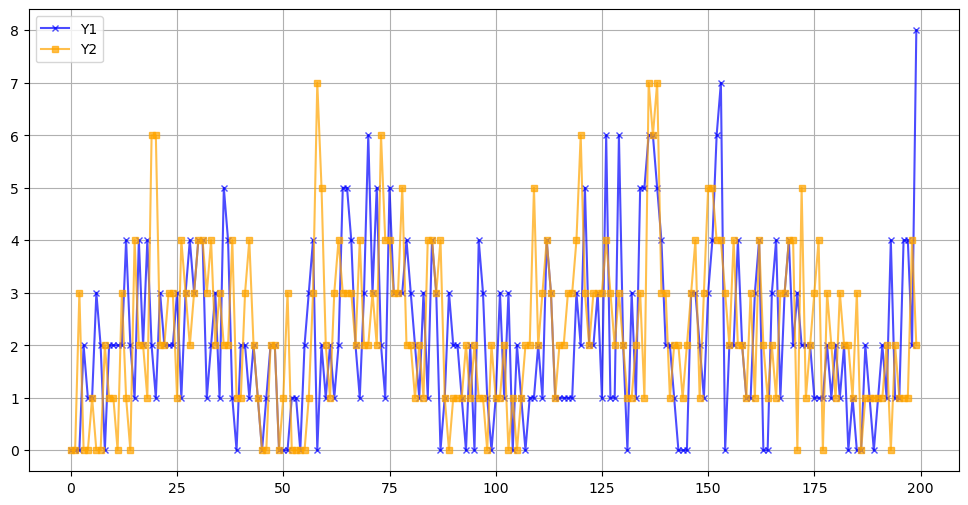

In [5]:
#graphe des series superposees
plt.figure(figsize=(12, 6))
plt.plot(y[0,:], label='Y1', marker='x', linestyle='-', color='b', alpha=0.7, markersize = 4)
plt.plot(y[1,:], label='Y2', marker='s', linestyle='-', color='orange', alpha=0.7, markersize = 4)
plt.legend()
plt.grid(True)
plt.show()

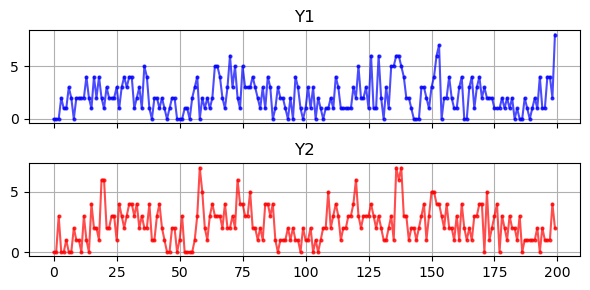

In [6]:
#graphe des series separees
fig, axs = plt.subplots(2, 1, figsize=(6, 3), sharex=True) #division de la figure en 2 lignes une colonne
#sharex: les figures partagent le meme axe des x

#Variable 1
axs[0].plot(y[0,:], label='Y1', marker='o', linestyle='-', color='blue', alpha=0.7, markersize = 2)
axs[0].grid(True)
axs[0].set_title('Y1')
#Variable 2
axs[1].plot(y[1,:], label='Y2', marker='o', linestyle='-', color='red', alpha=0.7, markersize = 2)
axs[1].grid(True)
axs[1].set_title('Y2')

plt.tight_layout()
plt.show()

### Replications


In [16]:
parameters = {
    'M1': {
        'A': np.array([[0.3, 0.2], [0.1, 0.3]]),
        'B': np.array([[0.1, 0.2], [0.3, 0.2]]),
        'omeg': np.array([0.5, 0.3]),
        'delt': 0.4
    },
    'M2': {
        'A': np.array([[0.2, 0], [0, 0.4]]),
        'B': np.array([[0.5, 0], [0, 0.3]]),
        'omeg': np.array([0.3, 0.5]),
        'delt': 0.7
    },
    'M3': {
        'A': np.array([[0.2, 0.0], [0.0, 0.4]]),
        'B': np.array([[0.5, 0.1], [0.3, 0.2]]),
        'omeg': np.array([0.3, 0.5]),
        'delt': 0.7
    }
}

In [7]:
#nombre de replications
nrep = 200

In [8]:
#on va faire des replications pour des tailles de series differentes
sizes = [200, 500, 1000]

In [10]:
#on cree un sous fichier pour y sauvegarder les replications
base_folder = "replications"
os.makedirs(base_folder, exist_ok=True)

In [12]:
RepEst = np.zeros((10, nrep))
np.shape(RepEst)

(10, 200)

In [33]:
size_folder

'replications\\M3\\size_200'

In [35]:
base_folder = "replications"
for model in parameters: #on va parcourir les modeles
    model_folder = os.path.join(base_folder, model)        
    print(model_folder)
    for size in sizes: #on regarde les tailles des series
        size_folder = os.path.join(model_folder, f"size_{size}")
        print(size_folder)
        RepEst = np.zeros((10,nrep))
        for i in range(1,nrep+1):
            filename = f"databp_{str(i).zfill(3)}.csv"
            filepath = os.path.join(size_folder, filename)
            if os.path.exists(filepath):
                data = np.loadtxt(filepath, delimiter=',')
                print(f"loaded model: {model}, size: {size}, replication: {filename} with shape {data.shape}")
                omega, A, B = estimate_model(data, 3)
                print(f"model estimated from data {model} {size} :{str(i).zfill(3)}")
                RepEst[0,i-1], RepEst[5,i-1] = omega[0], omega[1]
                RepEst[1,i-1], RepEst[2,i-1] = A[0,0], A[0,1]
                RepEst[6,i-1], RepEst[7,i-1] = A[1,0], A[1,1]
                RepEst[3,i-1], RepEst[4,i-1] = B[0,0], B[0,1]
                RepEst[8,i-1], RepEst[9,i-1] = B[1,0], B[1,1]
                estimname = f"repestim_{model}_{size}.csv"
                estimpath = os.path.join(size_folder, estimname)
                np.savetxt(estimpath, RepEst, delimiter=",")
                print(f"estimation saved to {estimpath}")
                
            else:
                print(f"File {filename} does not exist.")
      



replications\M1
replications\M1\size_200
loaded model: M1, size: 200, replication: databp_001.csv with shape (200, 2)
model estimated from data M1 200 :001
estimation saved to replications\M1\size_200\repestim_M1_200.csv
loaded model: M1, size: 200, replication: databp_002.csv with shape (200, 2)
model estimated from data M1 200 :002
estimation saved to replications\M1\size_200\repestim_M1_200.csv
loaded model: M1, size: 200, replication: databp_003.csv with shape (200, 2)
model estimated from data M1 200 :003
estimation saved to replications\M1\size_200\repestim_M1_200.csv
loaded model: M1, size: 200, replication: databp_004.csv with shape (200, 2)
model estimated from data M1 200 :004
estimation saved to replications\M1\size_200\repestim_M1_200.csv
loaded model: M1, size: 200, replication: databp_005.csv with shape (200, 2)
model estimated from data M1 200 :005
estimation saved to replications\M1\size_200\repestim_M1_200.csv
loaded model: M1, size: 200, replication: databp_006.csv wi

In [15]:
meanest = RepEst.mean(axis = 1)
np.shape(RepEst)
np.shape(meanest)
print(meanest)

[0.58910474 0.22482957 0.24805485 0.09750904 0.20759229 0.31820756
 0.16005587 0.24735754 0.28609595 0.19308021]
